In [1]:
import numpy as np
import pandas as pd
import pydicom
import os
import matplotlib.pyplot as plt
import cv2
from glob import glob
import math
import csv
from utils import imshow

lidc_folder = "/home/cbel/Desktop/zhe/LIDC"
data_folder = "/home/cbel/Desktop/zhe/data"
list_path = "/home/cbel/Desktop/zhe/LIDC/new_list.csv"

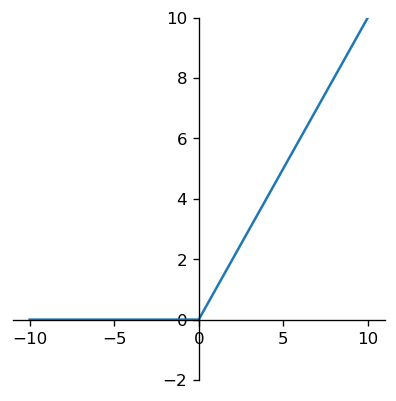

In [2]:
def ReLU(x):
    y = x.copy()
    y[y<=0] = 0
    return y

x = np.arange(-10, 11)
y = ReLU(x)
plt.figure(figsize=(4, 4), dpi=120)
plt.plot(x, y)
plt.ylim([-2, 10])
ax = plt.gca()#獲取當前座標的位置
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
ax.xaxis.set_ticks_position('bottom') # 設定bottom為x軸
ax.yaxis.set_ticks_position('left') # 設定left為x軸
ax.spines['bottom'].set_position(('data',0))#這個位置的括號要注意
ax.spines['left'].set_position(('data',0))
plt.savefig(data_folder + "/other/ReLU.tiff")
plt.show()

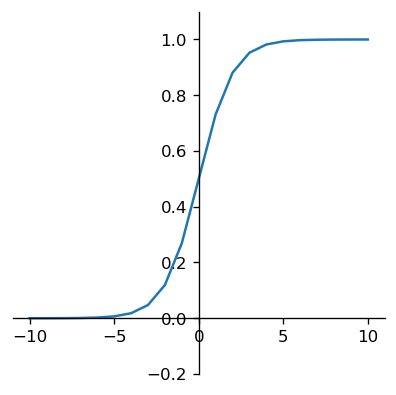

In [14]:
def Sigmoid(x):
    y = x.copy()
    y = 1/(1+np.exp(-x))
    return y

x = np.arange(-10, 11)
y = Sigmoid(x)
plt.figure(figsize=(4, 4), dpi=120)
plt.plot(x, y)
plt.ylim([-0.2, 1.1])
ax = plt.gca()#獲取當前座標的位置
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
ax.xaxis.set_ticks_position('bottom') # 設定bottom為x軸
ax.yaxis.set_ticks_position('left') # 設定left為x軸
ax.spines['bottom'].set_position(('data',0))#這個位置的括號要注意
ax.spines['left'].set_position(('data',0))
plt.savefig(data_folder + "/other/Sigmoid.tiff")
plt.show()

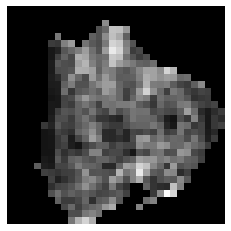

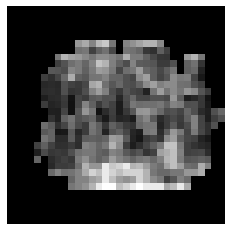

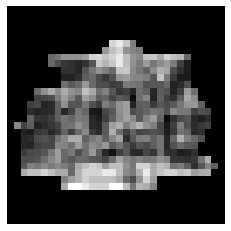

In [16]:
# plot single nodule for different features
feature = "HOM"
img_path = glob(data_folder + f"/multi_view/{feature}/*.npy")
img_path.sort()
img = np.load(img_path[0])
plane = ["axial", "coronal", "sagittal"]
for i in range(len(img)):
    plt.imshow(np.squeeze(img[i][1]), cmap="gray")
    plt.axis("off")
    plt.savefig(data_folder + f"/other/{feature}_{plane[i]}.tiff")
    plt.show()

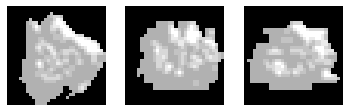

In [24]:
# plot consecutive nodules with different feature
feature = "COA"
img_path = glob(data_folder + f"/multi_view/{feature}/*.npy")
img_path.sort()
img = np.load(img_path[0])
for i in range(len(img)):
    plt.subplot(1, 3, i+1)
    plt.imshow(np.squeeze(img[i][1]), cmap="gray")
    plt.axis("off")
plt.savefig(data_folder + f"/other/{feature}.tiff")
plt.show()

In [25]:
def load_data(df, is_malignancy, feature):
    imgs_path = glob(data_folder + f"/multi_view/{feature}/*.npy")
    imgs_path.sort()
    
    if is_malignancy == 1:
        index = df[df["malignancy"]==1]["nodule_number"].values
    if is_malignancy == 0:
        index = df[df["malignancy"]==0]["nodule_number"].values
    if is_malignancy == 2:
        index = df[df["malignancy"]==2]["nodule_number"].values
    labels = []
    imgs = []
    for i in range(len(imgs_path)):
        num = int(imgs_path[i][-8:-4])
        if num in index:
            labels.append(int(df[df["nodule_number"]==num]["malignancy"]))
            img = np.load(imgs_path[i])
            imgs.append(img)
    imgs = np.array(imgs)
    labels = np.array(labels)[:, np.newaxis]
    return imgs, labels

In [26]:
feature = "HOM"
df = pd.read_csv(data_folder + "/final_annotation.csv")
df_in = df[df["malignancy"]==2]
df_ma = df[df["malignancy"]==1]
df_be = df[df["malignancy"]==0]
print("nodule number")
print("benign:%d, malignancy:%d, indeterminate:%d" %(len(df_be), len(df_ma), len(df_in)))

imgs_0, labels_0 = load_data(df, 0, feature)
imgs_1, labels_1 = load_data(df, 1, feature)
imgs_2, labels_2 = load_data(df, 2, feature)

nodule number
benign:447, malignancy:430, indeterminate:509


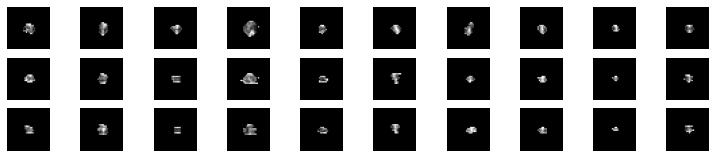

In [27]:
fig, ax = plt.subplots(figsize=(50, 50))
fig.subplots_adjust(top=0.05, bottom=0.01, left=0.7)
n = 1
x = len(imgs_0) // 10
for i in range(0, len(imgs_0), x+1):
    for j in range(3):
        plt.subplot(3, 10, n+j*10)
        plt.imshow(np.squeeze(imgs_0[i][j][1]), cmap="gray")
        plt.axis("off")
    n+=1
plt.show()

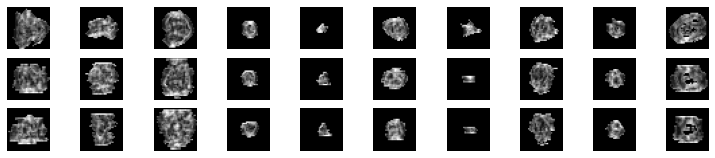

In [28]:
fig, ax = plt.subplots(figsize=(50, 50))
fig.subplots_adjust(top=0.05, bottom=0.01, left=0.7)
n = 1
x = [0, 11, 26, 58, 140, 186, 230, 381, 396, 429]
for i in x:
    for j in range(3):
        plt.subplot(3, 10, n+j*10)
        plt.imshow(np.squeeze(imgs_1[i][j][1]), cmap="gray")
        plt.axis("off")
    n+=1
plt.show()

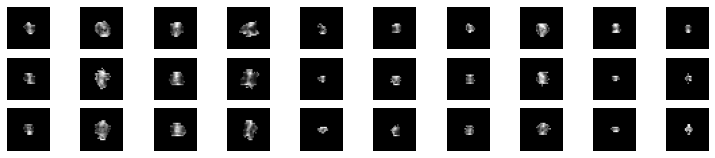

In [29]:
fig, ax = plt.subplots(figsize=(50, 50))
fig.subplots_adjust(top=0.05, bottom=0.01, left=0.7)
n = 1
x = len(imgs_2) // 10
for i in range(0, len(imgs_2), x+2):
    for j in range(3):
        plt.subplot(3, 10, n+j*10)
        plt.imshow(np.squeeze(imgs_2[i][j][1]), cmap="gray")
        plt.axis("off")
    n+=1
plt.show()